In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def f():
    print("-------------------------")

In [2]:
df = pd.read_csv("data.csv", date_parser=True)
f()
print(f"{df.shape[0]} rows\n{df.shape[1]} columns")

-------------------------
2803 rows
1383 columns


In [3]:
f()
print(f"Columns types distribution:\n\n{df.dtypes.value_counts()}")

-------------------------
Columns types distribution:

float64    1378
object        3
int64         2
dtype: int64


In [4]:
f()
a = df.isna().sum().where(lambda x:x>0).dropna()
print(f"There are {len(a)} (out of {df.shape[1]}, [{round(len(a)/df.shape[1]*100)}%]) columns that contains 1 or more NA")

-------------------------
There are 33 (out of 1383, [2%]) columns that contains 1 or more NA


In [5]:
f()
a = a.sort_values()/len(df)*100
if (a == 100).sum():
    df.drop(columns=a[a==100].index, inplace=True)
    print(f"There are {(a == 100).sum()} columns that are all Missing values, so we droped those.\nNow The data have:\n{df.shape[0]} rows\n{df.shape[1]} columns\n\nDropped columns names:")
    for i in a[a==100].index:
        print(i)
    a = a[a != 100]

-------------------------
There are 31 columns that are all Missing values, so we droped those.
Now The data have:
2803 rows
1352 columns

Dropped columns names:
outgoing_call_logs_weekdays_max_standriezed
outgoind_call_log_COUNT_mean_standriezed
outgoind_call_log_COUNT_median_standriezed
outgoing_call_logs_weekends_mean_standriezed
count_of_days_no_outgoing_call_standriezed
outgoind_call_log_COUNT_min_standriezed
picture_count_Downloads_standriezed
outgoind_call_log_COUNT_max_standriezed
outgoing_call_logs_weekends_max_standriezed
outgoing_call_logs_weekends_std_standriezed
outgoing_call_logs_weekends_min_standriezed
outgoind_call_log_COUNT_std_standriezed
outgoing_call_logs_weekdays_mean_standriezed
days_since_last_outgoing_call_standriezed
calendar_events_count_standriezed
outgoing_call_logs_weekdays_std_standriezed
video_standriezed
audio_standriezed
darkweb_count_ratio_standriezed
dangerous_count_ratio_standriezed
darkweb_count_standriezed
dangerous_count_standriezed
null_weekday_

In [6]:
f()
print(f"NA columns data type Distribution:\n\n{df[a.index].dtypes.value_counts()}")

-------------------------
NA columns data type Distribution:

float64    2
dtype: int64


In [7]:
f()
if a.size:
    print(f"NaN Ratio (0-100)\n\n{a}")
else:
    print("Now There is no NaN value in our Data")

-------------------------
NaN Ratio (0-100)

min_call_Duration_sqrt    0.035676
min_call_Duration_log     0.035676
dtype: float64


In [8]:
if a.size:
    f()
#     is ko uncomment karna h
#     ans = input("Are you need to remove some columns?[y|n]")
    ans = "n" 
    if ans == "y":
        to_remove = input("Please Enter columns names delimated by $\neg:Columns_1$Columns_2").split("$")
        df.drop(columns=to_remove, inplace=True)
        print(f"Now The Data have:\n{df.shape[0]} rows\n{df.shape[1]} columns")

-------------------------


In [9]:
# IMPUTING missing values??????????????

In [10]:
# Numerical Data Validation

In [11]:
numerical_cols = df.head().select_dtypes("number").columns
numerical_summary = df[numerical_cols].agg([min,max, np.mean, 'count', pd.Series.nunique]).T
numerical_summary.columns = numerical_summary.columns.str.capitalize()
del numerical_cols

In [12]:
Numeric_only_one_unique_value = numerical_summary[numerical_summary.Nunique == 1]
if len(Numeric_only_one_unique_value):
    df.drop(columns=Numeric_only_one_unique_value.index, inplace=True)
    print(f"There are {len(Numeric_only_one_unique_value)} variables That have only one unique value, so we drop those.\n\nNow the data have:\n{df.shape[0]} rows\n{df.shape[1]} columns\n\nThose columns names in order:\n")
    for i in Numeric_only_one_unique_value.index.sort_values():
        print(i)
    numerical_summary.drop(Numeric_only_one_unique_value.index, inplace=True)
    del Numeric_only_one_unique_value

There are 157 variables That have only one unique value, so we drop those.

Now the data have:
2803 rows
1195 columns

Those columns names in order:

INBOX_weekend_min
INBOX_weekend_min_log
INBOX_weekend_min_sqrt
SENT_weekend_min
SENT_weekend_min_log
SENT_weekend_min_sqrt
audio
audio_log
audio_sqrt
calendar_events_count
calendar_events_count_log
calendar_events_count_sqrt
count_of_days_no_outgoing_call
count_of_days_no_outgoing_call_log
count_of_days_no_outgoing_call_sqrt
dangerous_count
dangerous_count_log
dangerous_count_ratio
dangerous_count_ratio_log
dangerous_count_ratio_sqrt
dangerous_count_sqrt
darkweb_count
darkweb_count_log
darkweb_count_ratio
darkweb_count_ratio_log
darkweb_count_ratio_sqrt
darkweb_count_sqrt
days_between_first_and_last_day_outgoing_call
days_between_first_and_last_day_outgoing_call_log
days_between_first_and_last_day_outgoing_call_sqrt
days_since_last_outgoing_call
days_since_last_outgoing_call_log
days_since_last_outgoing_call_sqrt
min_call_Duration_log
min

In [13]:
min_is_nagetive = numerical_summary.Min[numerical_summary.Min < 0]
if min_is_nagetive.size:
    print(f"There are {min_is_nagetive.size} numeric columns that have minimum value is less than 0, is This ok?\n\nThose columns names (in order):\n\n")
    for i in min_is_nagetive.index.sort_values():
        print(i)
del min_is_nagetive

There are 383 numeric columns that have minimum value is less than 0, is This ok?

Those columns names (in order):


+1_files_in_one_day_qty_log
+1_files_in_one_day_qty_standriezed
+1_files_in_one_day_ratio_log
+1_files_in_one_day_ratio_standriezed
1_file_in_one_day_qty_log
1_file_in_one_day_qty_standriezed
1_file_in_one_day_ratio_log
1_file_in_one_day_ratio_standriezed
Body_nunique_log
Body_nunique_standriezed
INBOX_body_nunique_max_log
INBOX_body_nunique_max_standriezed
INBOX_body_nunique_mean_log
INBOX_body_nunique_mean_standriezed
INBOX_body_nunique_median_log
INBOX_body_nunique_median_standriezed
INBOX_body_nunique_min_log
INBOX_body_nunique_min_standriezed
INBOX_body_nunique_std_log
INBOX_body_nunique_std_standriezed
INBOX_count_Normal_user_log
INBOX_count_Normal_user_standriezed
INBOX_count_company_log
INBOX_count_company_standriezed
INBOX_count_log
INBOX_count_perc_log
INBOX_count_perc_standriezed
INBOX_count_standriezed
INBOX_mean_Normal_user_log
INBOX_mean_Normal_user_standri

In [14]:
min_is_0 = numerical_summary.Min[numerical_summary.Min == 0]
if min_is_0.size:
    print(f"There are {min_is_0.size} numeric columns that have minimum value is 0, is This ok?\n\nThose columns names (in order):\n\n")
    for i in min_is_0.index.sort_values():
        print(i)
del min_is_0

There are 729 numeric columns that have minimum value is 0, is This ok?

Those columns names (in order):


+1_files_in_one_day_qty
+1_files_in_one_day_qty_sqrt
+1_files_in_one_day_ratio
+1_files_in_one_day_ratio_sqrt
1_file_in_one_day_qty
1_file_in_one_day_qty_sqrt
1_file_in_one_day_ratio
1_file_in_one_day_ratio_sqrt
Body_nunique
Body_nunique_sqrt
INBOX_body_nunique_max
INBOX_body_nunique_max_sqrt
INBOX_body_nunique_mean
INBOX_body_nunique_mean_sqrt
INBOX_body_nunique_median
INBOX_body_nunique_median_sqrt
INBOX_body_nunique_min
INBOX_body_nunique_min_sqrt
INBOX_body_nunique_std
INBOX_body_nunique_std_sqrt
INBOX_count
INBOX_count_Normal_user
INBOX_count_Normal_user_sqrt
INBOX_count_company
INBOX_count_company_sqrt
INBOX_count_perc
INBOX_count_perc_sqrt
INBOX_count_sqrt
INBOX_mean_Normal_user
INBOX_mean_Normal_user_sqrt
INBOX_mean_company
INBOX_mean_company_sqrt
INBOX_weekday_max
INBOX_weekday_max_sqrt
INBOX_weekday_mean
INBOX_weekday_mean_sqrt
INBOX_weekday_min
INBOX_weekday_min_sqrt
IN

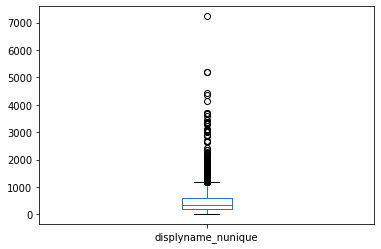

In [30]:
def plot_numerical_columns(col_name):
#     df[col_name].plot(figsize=(13,8));
#     plt.title(col_name, size=18);
#     plt.axvline(x=df[col_name].mean(), color='red');
#     plt.axvline(x=df[col_name].median(), color='green');
#     plt.legend(['Actual', 'Mean', 'Median']);
#     plt.show()
    
#     df[col_name].sort_values().reset_index(drop=True).plot(figsize=(13,8));
#     plt.title(col_name+" (SORTED)", size=18);
#     plt.axvline(x=df[col_name].mean(), color='red');
#     plt.axvline(x=df[col_name].median(), color='green');
#     plt.legend(['Actual', 'Mean', 'Median']);
#     plt.show()

    df[col_name].plot(kind="box")
    plt.title(col_name, size=18);
    
    
plot_numerical_columns(df.select_dtypes("number").columns[0])